In [1]:
import numpy as np
import sympy as sp
import matplotlib
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline 
%precision 5

'%.5f'

In [64]:
def thetadot(theta):
    k=10
    return k*(1-theta)*theta

In [71]:
# FORWARD EULER
t_Final = 10
n_dt = 100
dt = t_Final/(n_dt-1)
theta_vecFE = np.zeros((n_dt))
# initial condition 
theta_vecFE[0] = 0.5
for i in range(1,n_dt):
    theta_vecFE[i] = theta_vecFE[i-1] + dt*thetadot(theta_vecFE[i-1])
    

In [72]:
# FORWARD EULER with large time step 
t_Final = 10
n_dt = 50
dt = t_Final/(n_dt-1)
theta_vecFE2 = np.zeros((n_dt))
# initial condition 
theta_vecFE2[0] = 0.5
for i in range(1,n_dt):
    theta_vecFE2[i] = theta_vecFE2[i-1] + dt*thetadot(theta_vecFE2[i-1])


In [73]:
def dthetadotdtheta(theta):
    k = 10
    return k*(1-theta) - k*theta

In [74]:
## BACKWARD EULER 
t_Final = 10
n_dt = 100
dt = t_Final/(n_dt-1)
theta_vecBE = np.zeros((n_dt))
theta_vecBE[0] = 0.5
for i in range(1,n_dt):
    # equation to solve! Note the unknown appears on both the left and right
    # hand sides of the equation 
    # theta_vecBE[i] = theta_vecBE[i-1] + dt*thetadot(theta_vecBE[i])
    # Newton-Loop
    # initial guess
    theta_vecBE[i] = theta_vecBE[i-1]
    resnorm = 1
    tol = 1e-5
    itermax = 10 
    iter = 0
    while resnorm>tol and iter<itermax:
        res = theta_vecBE[i] - theta_vecBE[i-1] - dt*thetadot(theta_vecBE[i])
        dres = 1-dt*dthetadotdtheta(theta_vecBE[i])
        theta_vecBE[i] = theta_vecBE[i] - res/dres 
        resnorm = np.abs(res)
        iter+=1 
    print('time step ',i)
    print('Newton residual %f at %i iterations'%(resnorm,iter))

time step  1
Newton residual 0.000002 at 4 iterations
time step  2
Newton residual 0.000000 at 4 iterations
time step  3
Newton residual 0.000000 at 4 iterations
time step  4
Newton residual 0.000001 at 3 iterations
time step  5
Newton residual 0.000000 at 3 iterations
time step  6
Newton residual 0.000000 at 3 iterations
time step  7
Newton residual 0.000000 at 3 iterations
time step  8
Newton residual 0.000007 at 2 iterations
time step  9
Newton residual 0.000002 at 2 iterations
time step  10
Newton residual 0.000000 at 2 iterations
time step  11
Newton residual 0.000000 at 2 iterations
time step  12
Newton residual 0.000000 at 2 iterations
time step  13
Newton residual 0.000000 at 2 iterations
time step  14
Newton residual 0.000000 at 2 iterations
time step  15
Newton residual 0.000000 at 2 iterations
time step  16
Newton residual 0.000000 at 2 iterations
time step  17
Newton residual 0.000010 at 1 iterations
time step  18
Newton residual 0.000005 at 1 iterations
time step  19
Newto

In [75]:
## BACKWARD EULER with bigger time step
t_Final = 10
n_dt = 50
dt = t_Final/(n_dt-1)
theta_vecBE2 = np.zeros((n_dt))
theta_vecBE2[0] = 0.5
for i in range(1,n_dt):
    # equation to solve! Note the unknown appears on both the left and right
    # hand sides of the equation 
    # theta_vecBE[i] = theta_vecBE[i-1] + dt*thetadot(theta_vecBE[i])
    # Newton-Loop
    # initial guess
    theta_vecBE2[i] = theta_vecBE2[i-1]
    resnorm = 1
    tol = 1e-5
    itermax = 20 
    iter = 0
    while resnorm>tol and iter<itermax:
        res = theta_vecBE2[i] - theta_vecBE2[i-1] - dt*thetadot(theta_vecBE2[i])
        dres = 1-dt*dthetadotdtheta(theta_vecBE2[i])
        theta_vecBE2[i] = theta_vecBE2[i] - res/dres 
        resnorm = np.abs(res)
        iter+=1 
    print('time step ',i)
    print('Newton residual %f at %i iterations'%(resnorm,iter))

time step  1
Newton residual 0.000001 at 5 iterations
time step  2
Newton residual 0.000000 at 4 iterations
time step  3
Newton residual 0.000004 at 3 iterations
time step  4
Newton residual 0.000000 at 3 iterations
time step  5
Newton residual 0.000000 at 3 iterations
time step  6
Newton residual 0.000005 at 2 iterations
time step  7
Newton residual 0.000001 at 2 iterations
time step  8
Newton residual 0.000000 at 2 iterations
time step  9
Newton residual 0.000000 at 2 iterations
time step  10
Newton residual 0.000000 at 2 iterations
time step  11
Newton residual 0.000000 at 2 iterations
time step  12
Newton residual 0.000006 at 1 iterations
time step  13
Newton residual 0.000002 at 1 iterations
time step  14
Newton residual 0.000001 at 1 iterations
time step  15
Newton residual 0.000000 at 1 iterations
time step  16
Newton residual 0.000000 at 1 iterations
time step  17
Newton residual 0.000000 at 1 iterations
time step  18
Newton residual 0.000000 at 1 iterations
time step  19
Newto

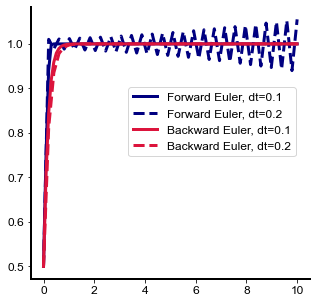

In [82]:
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)    
fig, ax = plt.subplots(1, 1,figsize=(5,5))
ax.plot(np.linspace(0,t_Final,100),theta_vecFE,label='Forward Euler, dt=0.1',lw=3,color='navy')
ax.plot(np.linspace(0,t_Final,50),theta_vecFE2,label='Forward Euler, dt=0.2',lw=3,color='navy',linestyle='--')
ax.plot(np.linspace(0,t_Final,100),theta_vecBE,label='Backward Euler, dt=0.1',lw=3,color='crimson')
ax.plot(np.linspace(0,t_Final,50),theta_vecBE2,label='Backward Euler, dt=0.2',lw=3,color='crimson',linestyle='--')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc=(0.35,0.45))
plt.savefig('Euler_Scheme.png')

In [79]:
dt

0.20408